In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [15]:
df_red = pd.read_csv("winequality-red.csv",sep=';')

In [17]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Text(0.5, 1.0, 'Correlation between variables')

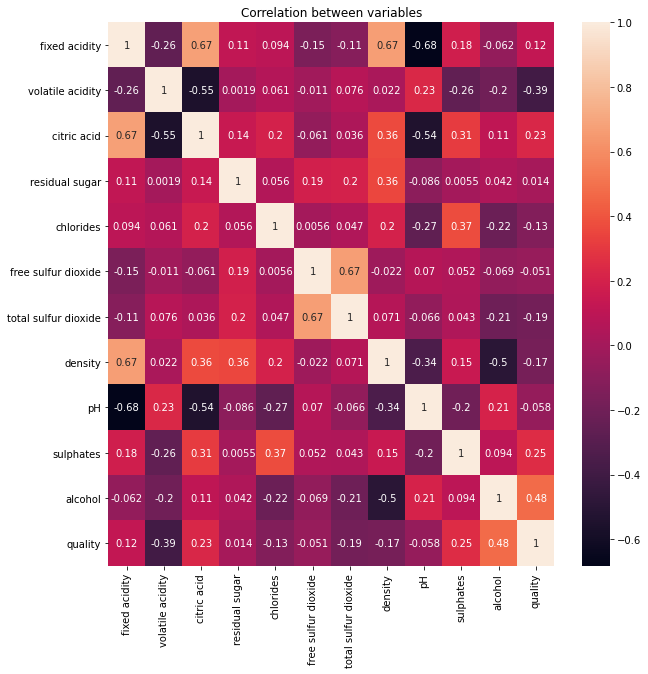

In [23]:
import seaborn as sns
corr = df_red.corr()
fig, ax = plt.subplots(figsize = (10,10))
g= sns.heatmap(corr,ax=ax, annot= True)
ax.set_title('Correlation between variables')

From the above correlation matrix, we can see that there are few variables which are very less corelated with the target variable "Quality". Dropping Residual Sugar,Free Sulphur Dioxide and Ph.

In [27]:
df_red=df_red.drop(["residual sugar","pH","free sulfur dioxide"],axis=1)

In [28]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   chlorides             1599 non-null   float64
 4   total sulfur dioxide  1599 non-null   float64
 5   density               1599 non-null   float64
 6   sulphates             1599 non-null   float64
 7   alcohol               1599 non-null   float64
 8   quality               1599 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 112.6 KB


In [54]:
y = df_red.quality
X = df_red.drop('quality',axis = 1)

In [55]:
X.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
chlorides               float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
dtype: object

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [58]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2)

In [59]:
regressor = LinearRegression()
regressor.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
coeff_df = pd.DataFrame({'Coefficient': regressor.coef_})
coeff_df.index = [['fixed acidity', 'volatile acidity', 'citric acid', 
                    'chlorides',  'total sulfur dioxide', 'density', 'sulphates','alcohol']]
coeff_df

,Coefficient
fixed acidity,0.094597
volatile acidity,-0.209612
citric acid,-0.039127
chlorides,-0.067583
total sulfur dioxide,-0.055043
density,-0.053690
sulphates,0.171720
alcohol,0.278047


In [61]:
y_pred = regressor.predict(test_X)

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 0.4886259425242695
Mean Squared Error: 0.3794632238719081
Root Mean Squared Error: 0.6160058635044866
